In [2]:
# Importing Library
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Dataset Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\gaura\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Jul 15 11:44:31 2024).


In [16]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df['job_posted_date'].dt.month
df_DA = df_DA.explode('job_skills')

In [18]:
df_DA_pivot = df_DA.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size')
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,11336.0,8170.0,6606.0,5596.0,4285.0,3607.0,3830.0,1880.0,1778.0,1251.0,1288.0,1304.0,1077.0,1130.0,1002.0,954.0,839.0,695.0,597.0,682.0,691.0,626.0,639.0,631.0,578.0,551.0,607.0,499.0,502.0,443.0,408.0,396.0,377.0,341.0,389.0,430.0,389.0,363.0,301.0,386.0,...,4.0,1.0,3.0,NaN,2.0,NaN,1.0,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2,7947.0,5772.0,4751.0,3936.0,3307.0,2576.0,2634.0,1291.0,1235.0,954.0,987.0,942.0,761.0,739.0,680.0,683.0,625.0,522.0,542.0,575.0,426.0,398.0,417.0,374.0,390.0,448.0,377.0,354.0,360.0,290.0,270.0,275.0,286.0,244.0,232.0,314.0,255.0,208.0,186.0,275.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7868.0,5675.0,4741.0,4051.0,3176.0,2650.0,2554.0,1266.0,1203.0,892.0,887.0,820.0,705.0,654.0,651.0,573.0,595.0,530.0,506.0,479.0,411.0,407.0,413.0,405.0,408.0,442.0,387.0,405.0,375.0,300.0,269.0,255.0,319.0,177.0,192.0,255.0,262.0,216.0,223.0,214.0,...,NaN,1.0,1.0,NaN,2.0,NaN,1.0,3.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,7553.0,5496.0,4557.0,3776.0,3106.0,2399.0,2598.0,1190.0,1177.0,947.0,832.0,868.0,720.0,686.0,669.0,584.0,617.0,473.0,543.0,497.0,449.0,421.0,375.0,397.0,348.0,413.0,369.0,360.0,345.0,270.0,251.0,292.0,275.0,234.0,240.0,259.0,231.0,220.0,212.0,229.0,...,NaN,1.0,NaN,2.0,2.0,NaN,2.0,2.0,1.0,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,6617.0,4773.0,4070.0,3245.0,2695.0,2093.0,1940.0,979.0,957.0,851.0,727.0,746.0,603.0,603.0,616.0,478.0,497.0,409.0,421.0,459.0,380.0,341.0,323.0,308.0,296.0,310.0,314.0,294.0,275.0,229.0,226.0,254.0,249.0,190.0,241.0,223.0,214.0,217.0,195.0,194.0,...,2.0,NaN,2.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,7584.0,5724.0,4707.0,3812.0,3275.0,2442.0,2174.0,1173.0,1237.0,987.0,915.0,824.0,770.0,581.0,675.0,622.0,624.0,526.0,549.0,513.0,386.0,381.0,394.0,372.0,360.0,393.0,331.0,333.0,355.0,289.0,256.0,282.0,265.0,258.0,283.0,265.0,222.0,249.0,295.0,225.0,...,1.0,2.0,3.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7687.0,5513.0,4831.0,3928.0,3350.0,2444.0,2118.0,1096.0,1069.0,996.0,949.0,909.0,778.0,692.0,655.0,634.0,574.0,526.0,527.0,455.0,442.0,413.0,367.0,362.0,388.0,366.0,324.0,310.0,329.0,256.0,285.0,293.0,270.0,279.0,288.0,230.0,239.0,254.0,279.0,230.0,...,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,3.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8823.0,6482.0,5576.0,4533.0,3859.0,2975.0,2560.0,1332.0,1298.0,1117.0,1035.0,990.0,924.0,868.0,713.0,710.0,670.0,554.0,596.0,483.0,475.0,501.0,496.0,439.0,474.0,413.0,358.0,405.0,387.0,315.0,332.0,294.0,267.0,351.0,320.0,292.0,334.0,291.0,285.0,281.0,...,3.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,3.0,1.0,NaN,1.0,3.0,NaN,1.0,1.0,1.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN

In [19]:
df_DA_pivot = df_DA_pivot.reset_index()

In [22]:
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,azure,oracle,aws,sql server,go,flow,vba,looker,snowflake,qlik,java,spark,jira,spss,javascript,alteryx,hadoop,sharepoint,outlook,bigquery,dax,gcp,mysql,databricks,sheets,ssis,c,git,pandas,ssrs,...,firestore,mlr,colocation,svelte,heroku,nuix,ionic,react.js,asp.net core,hugging face,objective-c,play framework,clojure,pascal,microsoft lists,debian,sqlserver,theano,qt,lisp,codecommit,blazor,f#,kali,couchdb,next.js,haskell,shogun,pulumi,mattermost,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,11336.0,8170.0,6606.0,5596.0,4285.0,3607.0,3830.0,1880.0,1778.0,1251.0,1288.0,1304.0,1077.0,1130.0,1002.0,954.0,839.0,695.0,597.0,682.0,691.0,626.0,639.0,631.0,578.0,551.0,607.0,499.0,502.0,443.0,408.0,396.0,377.0,341.0,389.0,430.0,389.0,363.0,301.0,386.0,...,4.0,1.0,3.0,NaN,2.0,NaN,1.0,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
Feb,7947.0,5772.0,4751.0,3936.0,3307.0,2576.0,2634.0,1291.0,1235.0,954.0,987.0,942.0,761.0,739.0,680.0,683.0,625.0,522.0,542.0,575.0,426.0,398.0,417.0,374.0,390.0,448.0,377.0,354.0,360.0,290.0,270.0,275.0,286.0,244.0,232.0,314.0,255.0,208.0,186.0,275.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar,7868.0,5675.0,4741.0,4051.0,3176.0,2650.0,2554.0,1266.0,1203.0,892.0,887.0,820.0,705.0,654.0,651.0,573.0,595.0,530.0,506.0,479.0,411.0,407.0,413.0,405.0,408.0,442.0,387.0,405.0,375.0,300.0,269.0,255.0,319.0,177.0,192.0,255.0,262.0,216.0,223.0,214.0,...,NaN,1.0,1.0,NaN,2.0,NaN,1.0,3.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Apr,7553.0,5496.0,4557.0,3776.0,3106.0,2399.0,2598.0,1190.0,1177.0,947.0,832.0,868.0,720.0,686.0,669.0,584.0,617.0,473.0,543.0,497.0,449.0,421.0,375.0,397.0,348.0,413.0,369.0,360.0,345.0,270.0,251.0,292.0,275.0,234.0,240.0,259.0,231.0,220.0,212.0,229.0,...,NaN,1.0,NaN,2.0,2.0,NaN,2.0,2.0,1.0,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
May,6617.0,4773.0,4070.0,3245.0,2695.0,2093.0,1940.0,979.0,957.0,851.0,727.0,746.0,603.0,603.0,616.0,478.0,497.0,409.0,421.0,459.0,380.0,341.0,323.0,308.0,296.0,310.0,314.0,294.0,275.0,229.0,226.0,254.0,249.0,190.0,241.0,223.0,214.0,217.0,195.0,194.0,...,2.0,NaN,2.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Jun,7584.0,5724.0,4707.0,3812.0,3275.0,2442.0,2174.0,1173.0,1237.0,987.0,915.0,824.0,770.0,581.0,675.0,622.0,624.0,526.0,549.0,513.0,386.0,381.0,394.0,372.0,360.0,393.0,331.0,333.0,355.0,289.0,256.0,282.0,265.0,258.0,283.0,265.0,222.0,249.0,295.0,225.0,...,1.0,2.0,3.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jul,7687.0,5513.0,4831.0,3928.0,3350.0,2444.0,2118.0,1096.0,1069.0,996.0,949.0,909.0,778.0,692.0,655.0,634.0,574.0,526.0,527.0,455.0,442.0,413.0,367.0,362.0,388.0,366.0,324.0,310.0,329.0,256.0,285.0,293.0,270.0,279.0,288.0,230.0,239.0,254.0,279.0,230.0,...,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,3.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aug,8823.0,6482.0,5576.0,4533.0,3859.0,2975.0,2560.0,1332.0,1298.0,1117.0,1035.0,990.0,924.0,868.0,713.0,710.0,670.0,554.0,596.0,483.0,475.0,501.0,496.0,439.0,474.0,413.0,358.0,405.0,387.0,315.0,332.0,294.0,267.0,351.0,320.0,292.0,334.0,291.0,285.0,281.0,...,3.0,2.0,NaN,NaN,1.0,NaN,NaN,2.0,3.0,1.0,NaN,1.0,3.0,NaN,1.0,1.0,1.0,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,Na

(0.0, 12000.0)

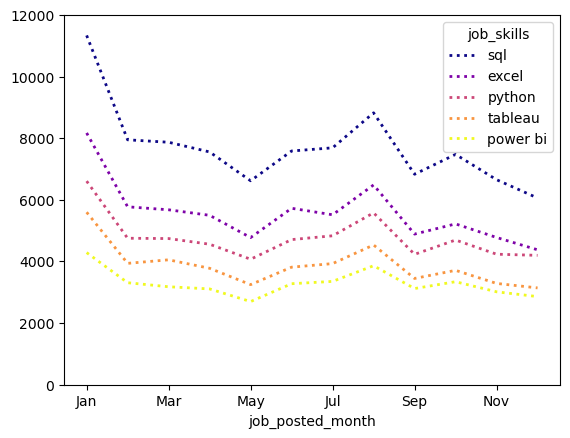

In [48]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linestyle=':',
    linewidth=2,
    colormap='plasma'
    )

plt.ylim(0, 12_000)

In [32]:
df_explode = df.explode('job_skills').copy()
skill_stats = df_explode.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'size')
)
skill_stats

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)
skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


In [39]:
from adjustText import adjust_text

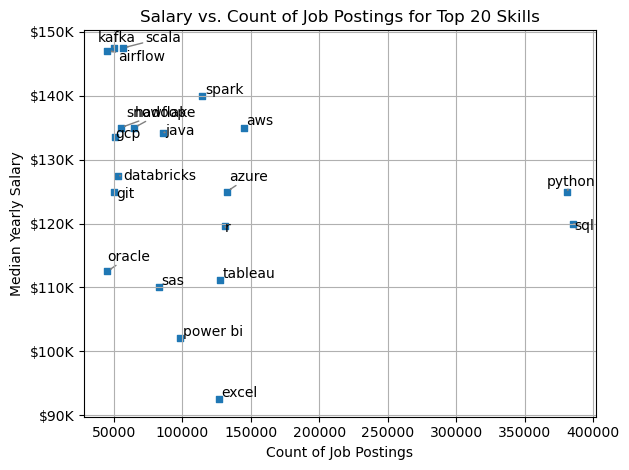

In [57]:
skill_stats.plot(
    kind ='scatter',
    x = 'skill_count',
    y = 'median_salary',
    marker = 's',
    s = 25
)

texts = []
for i, label in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], label))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

plt.grid(True)
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top 20 Skills')
plt.tight_layout()
plt.show()

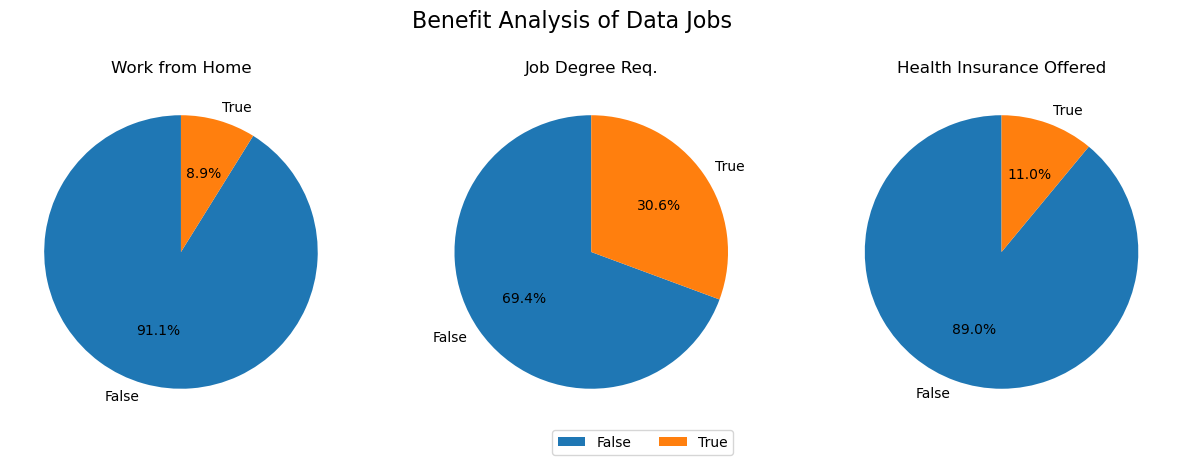

In [81]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15,5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center', bbox_to_anchor=(-0.55, 0), ncol=2)
plt.show()